# Task 2

In [1]:
from vector_fields import read_vectorfield_data, estimate_vectors, solve_trajectory, create_phase_portrait_matrix, create_phase_portrait_derivative
from function_approximation import approx_lin_func, approx_nonlin_func, plot_func_over_data, compute_bases
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
import math

In [2]:
# Functions for solve_ivp
def linear_approx(t, y):
    return A @ y

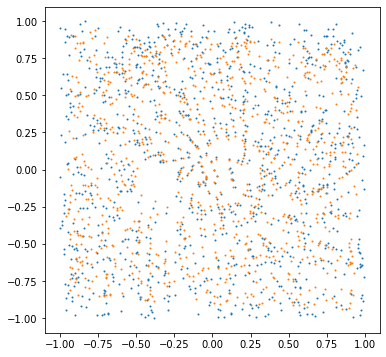

In [3]:
# read the vector field data
x0, x1 = read_vectorfield_data(base_filename="linear_vectorfield_data")
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.scatter(x0[:,0], x0[:,1], s=1)
ax.scatter(x1[:,0], x1[:,1], s=1)
plt.show()

Try to estimate a linear operator A for the linear vector fields with unknown deltaT

In [4]:
# search for best delta_t (the one giving lowest mse)
attempts = []
for dt in np.linspace(0.0001, 0.5, 500):
    v = estimate_vectors(dt, x0, x1)
    A, _, _, _ = approx_lin_func(data=(x0,v))    
    x1_pred, _, _ = solve_trajectory(x0, x1, linear_approx, plot=False)
    attempts.append([dt, np.linalg.norm(x1_pred-x1)**2 / x1.shape[0]])
    print(f"attempting with {attempts[-1][0]} got mse: {attempts[-1][1]}")

attempting with 0.0001 got mse: 0.5837770188446816
attempting with 0.0011018036072144289 got mse: 0.5847280387735483
attempting with 0.0021036072144288574 got mse: 0.5693898618141339
attempting with 0.0031054108216432862 got mse: 0.5119077529872891
attempting with 0.0041072144288577155 got mse: 0.4412437282609119
attempting with 0.005109018036072144 got mse: 0.37499507935855564
attempting with 0.006110821643286573 got mse: 0.3181653889555301
attempting with 0.007112625250501002 got mse: 0.2709491989718904
attempting with 0.00811442885771543 got mse: 0.23210728025109612
attempting with 0.009116232464929859 got mse: 0.20016025548914096
attempting with 0.010118036072144287 got mse: 0.1737767574174174
attempting with 0.011119839679358716 got mse: 0.1518562835182706
attempting with 0.012121643286573145 got mse: 0.13351957051006985
attempting with 0.013123446893787574 got mse: 0.1180732778826174
attempting with 0.014125250501002003 got mse: 0.10497230563887684
attempting with 0.0151270541082

attempting with 0.12532545090180358 got mse: 0.002723064746339433
attempting with 0.12632725450901802 got mse: 0.002717887019594616
attempting with 0.12732905811623244 got mse: 0.0027131152606187027
attempting with 0.12833086172344688 got mse: 0.002708732935845897
attempting with 0.12933266533066132 got mse: 0.0027047242249386315
attempting with 0.13033446893787573 got mse: 0.0027010739862599804
attempting with 0.13133627254509017 got mse: 0.002697767724225716
attempting with 0.13233807615230458 got mse: 0.0026947915584220015
attempting with 0.13333987975951903 got mse: 0.002692132194382122
attempting with 0.13434168336673344 got mse: 0.0026897768959229353
attempting with 0.13534348697394788 got mse: 0.0026877134589482635
attempting with 0.1363452905811623 got mse: 0.00268593018663236
attempting with 0.13734709418837673 got mse: 0.0026844158659022955
attempting with 0.13834889779559117 got mse: 0.0026831597451438243
attempting with 0.1393507014028056 got mse: 0.0026821515130594563
atte

attempting with 0.24954909819639276 got mse: 0.003064391407294528
attempting with 0.2505509018036072 got mse: 0.0030686054284281257
attempting with 0.25155270541082164 got mse: 0.0030728091934808326
attempting with 0.25255450901803606 got mse: 0.003077002557592673
attempting with 0.25355631262525047 got mse: 0.0030811853822507503
attempting with 0.2545581162324649 got mse: 0.0030853575350875797
attempting with 0.25555991983967935 got mse: 0.0030895188896858904
attempting with 0.25656172344689376 got mse: 0.0030936693253896972
attempting with 0.2575635270541082 got mse: 0.00309780872712139
attempting with 0.25856533066132265 got mse: 0.003101936985204691
attempting with 0.25956713426853706 got mse: 0.0031060539951932266
attempting with 0.26056893787575147 got mse: 0.003110159657704547
attempting with 0.2615707414829659 got mse: 0.003114253878259419
attempting with 0.26257254509018035 got mse: 0.003118336567126191
attempting with 0.26357434869739477 got mse: 0.0031224076391700648
attempt

attempting with 0.37477454909819635 got mse: 0.0034988446951637157
attempting with 0.37577635270541077 got mse: 0.0035016027767587293
attempting with 0.37677815631262523 got mse: 0.0035043509639474148
attempting with 0.37777995991983965 got mse: 0.0035070892984307793
attempting with 0.37878176352705406 got mse: 0.0035098178218503587
attempting with 0.37978356713426853 got mse: 0.0035125365757840976
attempting with 0.38078537074148294 got mse: 0.0035152456017423675
attempting with 0.38178717434869736 got mse: 0.0035179449411641126
attempting with 0.38278897795591177 got mse: 0.003520634635413156
attempting with 0.38379078156312624 got mse: 0.003523314725774599
attempting with 0.38479258517034065 got mse: 0.0035259852534513707
attempting with 0.38579438877755506 got mse: 0.0035286462595608913
attempting with 0.38679619238476953 got mse: 0.003531297785131862
attempting with 0.38779799599198395 got mse: 0.0035339398711011502
attempting with 0.38879979959919836 got mse: 0.003536572558310805

attempting with 0.5 got mse: 0.0037790695318709764


Compute the mean squared error to all the known points, given the calculated A

Residual error: [1.13769605e-12 3.98708288e-12]


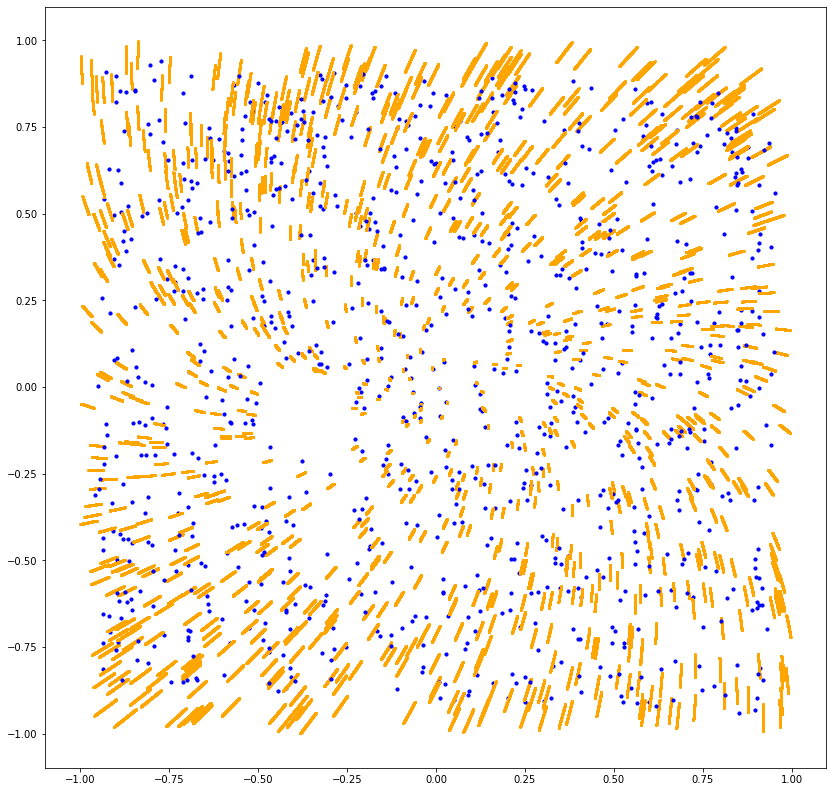

MSE value is: 0.0026804055616739047


In [5]:
# utilize delta_t for minimum mse, plot results
plt.rcParams["figure.figsize"] = (14,14)
v = estimate_vectors(0.1433579158316633, x0, x1)
A, res, _, _ = approx_lin_func(data=(x0,v))
print("Residual error:",res)
x1_pred, _, _ = solve_trajectory(x0, x1, linear_approx, end_time=0.1, plot=True)
print("MSE value is:", np.linalg.norm(x1_pred-x1)**2 / x1.shape[0])

Again solve the linear system with your matrix approximation given the initial point (10, 10), for Tend = 100, and visualize the trajectory as well as the phase portrait

Eigenvalues of A:  [-0.50605095+0.16177097j -0.50605095-0.16177097j]


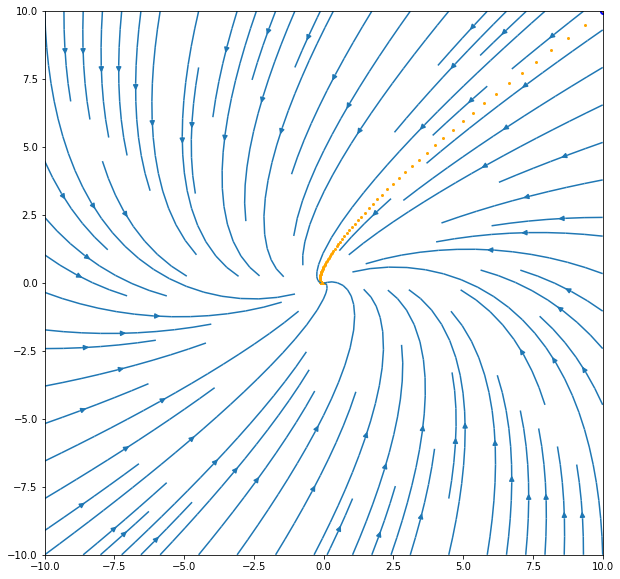

In [6]:
create_phase_portrait_matrix(A, title_suffix="unstable focus", display=False)
sol = solve_ivp(linear_approx, [0, 100], [10, 10], t_eval=np.linspace(0, 100, 1000))
plt.scatter(10, 10, c='blue')
plt.scatter(sol.y[0,:],sol.y[1,:], c='orange', s=4)
plt.rcParams["figure.figsize"] = (14,14)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()